In [ ]:
"""
스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별 하는것"""

In [10]:
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
data = iris['data']
feature_names = iris['feature_names']
target = iris['target']
df_iris = pd.DataFrame(data,columns = feature_names)
df_iris['target'] = target

x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1), df_iris['target'], stratify = df_iris['target'])

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [71]:
dtc = DecisionTreeClassifier(random_state = 0)

In [72]:
dtc.fit(x_train, y_train)
pred = dtc.predict(x_valid)
(pred == y_valid).mean()

0.9736842105263158

In [73]:
#시각화 진행 (어떠한 기준으로 분류를 하였는지 확인 가능)

findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.


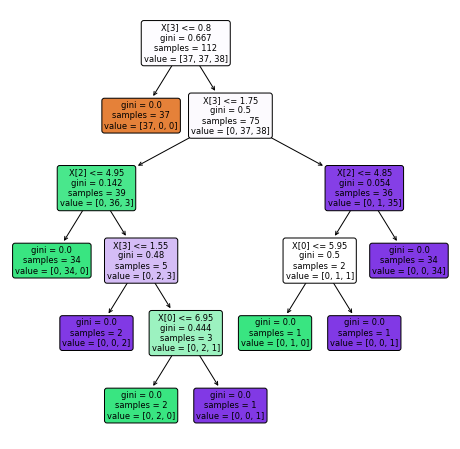

In [75]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plot_tree(dtc , filled=True, rounded=True)

plt.show()

In [ ]:
"""
value 에 클래스 갯수가 나타남 

1. x에 3번째 컬럼 기준으로 해서 0.8보다 작거나 같으면 무조건 첫번째 클래스!
2. 그렇지 않으면 x에 2번째 컬럼 기준으로 ~ 
이런식으로 가지 치지

지니계수: 불순도를 의미하며 계수가 높을수록 엔트로피가 크다는 의미
엔트로피가 크다는 의미는 쉽게 말해서, 클래스가 혼잡하게 섞여 있다는 뜻"""

In [60]:
dtc = DecisionTreeClassifier(max_depth = 2) #과적합을 방지함
dtc.fit(x_train, y_train)
pred = dtc.predict(x_valid)

findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.


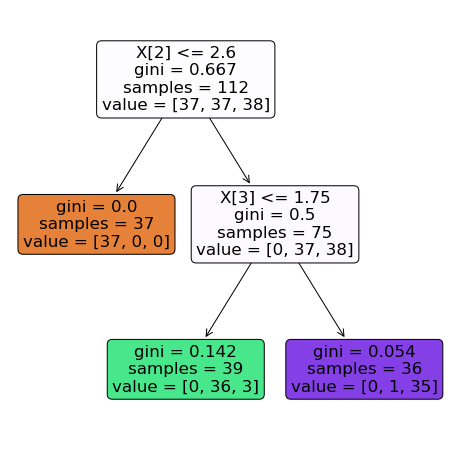

In [66]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plot_tree(dtc , filled=True, rounded=True)

plt.show()